In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os


from bnn import BNNBayesbyBackprop, gauss_logpdf
os.getcwd()

'/Users/d_berman/Documents/Tufts_Masters/Semester_3/Bayesian Deep Learning/BDL_final_project'

In [0]:
# Real dataset
#Emerson's Paths:
small_trained_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/smallTrainCleaned.csv"
y_label_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/y_labels.csv"
#small_trained_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/smallTrainCleaned.csv"
#y_label_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/y_labels.csv"
data = pd.read_csv(small_trained_path)
Y = pd.read_csv(y_label_path)

data['Y'] = Y
data['Y'][data['Y'] == -1] = 0
data = data.sample(frac=1).reset_index(drop=True)

print(Y)

In [0]:
batch_size = 100
n_iters = 3000

num_epochs = int(n_iters / (data.shape[0] / batch_size))

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_dataset = data[:train_size]
test_dataset = data[train_size:]


train_y = train_dataset['Y']
train_dataset = train_dataset.drop('Y', axis=1)

test_y = test_dataset['Y']
test_dataset = test_dataset.drop('Y', axis=1)


train_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(train_dataset.values),
                      torch.tensor(train_y.values)),
                  batch_size=batch_size,
                  shuffle=True)



test_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(test_dataset.values),
                      torch.tensor(test_y.values)),
                  batch_size=batch_size,
                  shuffle=True)

NameError: ignored

In [0]:
# Toy dataset
X_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_x.csv"
y_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_y.csv"

X = np.loadtxt(X_path, delimiter=',', dtype=np.float64)[:1000]
y = np.loadtxt(y_path, delimiter=',', dtype=np.float64)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)


OSError: ignored

Toy dataset for regression

In [97]:
W = np.array([-10, 10]).reshape(-1, 1)
b = -5
X_train = np.random.uniform(-10,10, (5000, 2))
X_train[:,0] = 0.0
X_train.shape
W.T.shape

eps = 0.0001
W_s = np.array([0.0, 0.3]).reshape(-1, 1)
print(W_s)
b_s = 0.1

print(b_s)

y_train = np.zeros((X_train.shape[0], 1), dtype=float)
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  y_train[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))



print(y_train)

[[0. ]
 [0.3]]
0.1
[[ 36.17517046]
 [-14.11119956]
 [  2.14273084]
 ...
 [ 65.86891179]
 [ 85.66993464]
 [-67.31481731]]


(array([628., 646., 592., 665., 621., 609., 672., 415., 128.,  24.]),
 array([-104.9880598 ,  -80.19734269,  -55.40662558,  -30.61590847,
          -5.82519135,   18.96552576,   43.75624287,   68.54695998,
          93.33767709,  118.1283942 ,  142.91911131]),
 <a list of 10 Patch objects>)

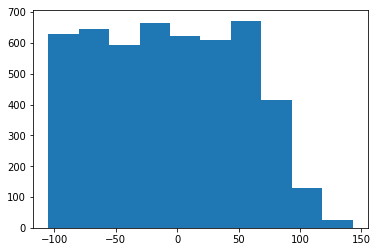

In [11]:
plt.hist(y_train)
# np.exp(10 * 0.01)

compare likelihood of test set given true mean and true variance and true variance + bias

In [5]:
tst = np.empty_like(X_train[:,0])
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  tst[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
tst

print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s)).sum())
print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s) + 100).sum())


-33145520362.758266
-31103853.933023214


In [2]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

print(y_train)
print(X_train)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')


NameError: name 'y_train' is not defined

Toy dataset for classification

In [173]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
X_train[:int(dataset_size/2),0] = np.random.normal(loc=0,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
X_train[:int(dataset_size/2), 1] = np.random.normal(loc=-5, 
                                                    scale=1, 
                                                    size=(int(dataset_size/2),))
y_train[:int(dataset_size/2)] = 0

X_train[int(dataset_size/2):,0] = np.random.normal(loc=0,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
X_train[int(dataset_size/2):, 1] = np.random.normal(loc=5,
                                                    scale=1,
                                                    size=(int(dataset_size/2),))
y_train[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_train = X_train[perm]
y_train = y_train[perm]

In [174]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

(-10, 10)

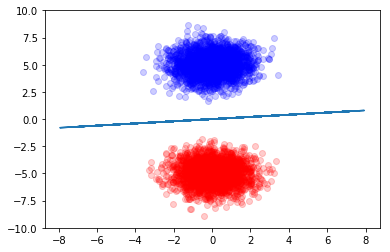

In [181]:
x1 = np.random.uniform(-8, 8, 100)
x2 = .1 * x1

plt.plot(x1, x2)
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', alpha=0.2)
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='blue', alpha=0.2)
plt.ylim((-10, 10))

array([[3],
       [4]])

In [105]:
W

array([[-10],
       [ 10]])

In [104]:
a = np.array([[1,2]]).T
b = np.array([[3,4]]).T
np.hstack((a,b))
# a.shape

array([[1, 3],
       [2, 4]])

## clearly predict function works

acc of BNN with q mean == true weights:  0.6846


mean log prior  -84.49564453125
mean log post est  -8.388436279296876
mean likelihood est  -inf
Accuracy with 0.1 as slope:  1.0


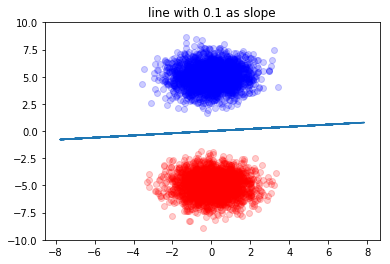

Accuracy with 0.5 as slope:  1.0


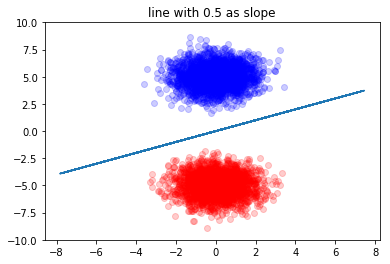

Accuracy with 1.0 as slope:  0.9998


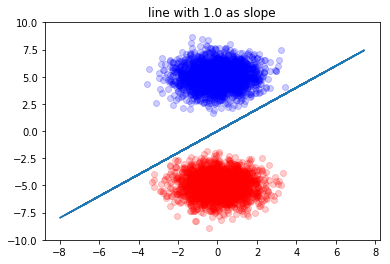

Accuracy with 3.0 as slope:  0.9416


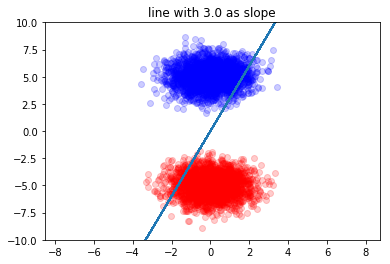

Accuracy with 10.0 as slope:  0.6732


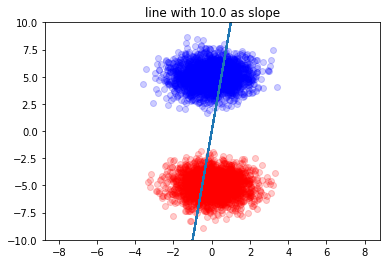

Accuracy with 100 as slope:  0.519


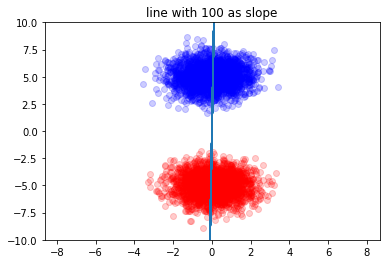

In [182]:

# Maybe we want to plot epoch by mean and std weight values for linear regression model 
# as well as the true weights used to create the toy dataset?

# Seems like a good diagnostic plot which we could include in our report

# for regression toy set
# W_full = np.hstack((W, W_s))
# W_full

# b_full = np.hstack((b, b_s))
# b_full[1] = 2.0

# for classificaiton toy set
w1 = np.array([[10,1]]).T
w2 = np.array([[0,0]]).T
W_full = np.hstack((w1, w2))



b_full = np.array([0])
# b_full[0], b_full[1] = 0,0
bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy() 

# W_full
# W
# preset_preds.shape
# print('MAE of BNN with q mean == true weights: ', np.mean(np.abs(preset_preds - y_train.flatten())))
print('acc of BNN with q mean == true weights: ', np.mean((preset_preds == y_train.flatten()).astype(int)))
print('\n')
# print(preset_preds[1], y_train[1])
# bnn_preset.model.l1.W_log_s_DO
# bnn_preset.model.l1.b_log_s_O
bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100).detach().numpy()


accuracies = []
weights = [0.1, 0.5, 1.0, 3.0, 10.0, 100]
for w in weights:
    W_full[0][0] = w
    bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
    preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy()
    print('Accuracy with {} as slope: '.format(w), np.mean((preset_preds == y_train.flatten()).astype(int)))
    
    
    x1 = np.random.uniform(-8, 8, 100)
    x2 = w * x1

    plt.title("line with {} as slope".format(w))
    plt.plot(x1, x2)
    plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', alpha=0.2)
    plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='blue', alpha=0.2)
    plt.ylim((-10, 10))
    plt.show()

## test ELBO as slope of line changes

ELBO components with 0.1 as slope: 

mean log prior  -6.299376831054688
mean log post est  -8.715519409179688
mean likelihood est  -57.4155322265625
Accuracy with 0.1 as slope:  100.0 %


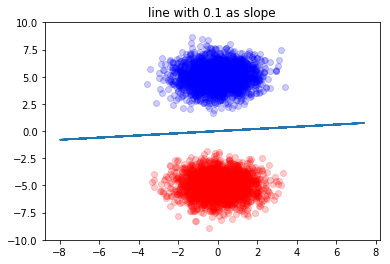

ELBO components with 0.5 as slope: 

mean log prior  -6.31061279296875
mean log post est  -8.474403686523438
mean likelihood est  -55.6005224609375
Accuracy with 0.5 as slope:  100.0 %


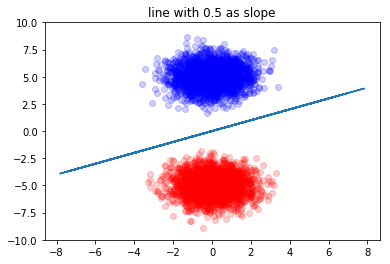

ELBO components with 1.0 as slope: 

mean log prior  -7.089906005859375
mean log post est  -8.15961181640625
mean likelihood est  -91.9363671875
Accuracy with 1.0 as slope:  99.98 %


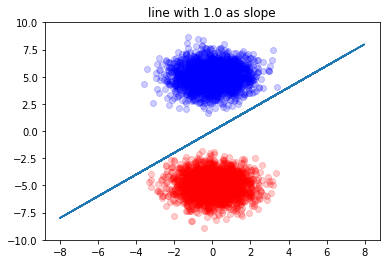

ELBO components with 3.0 as slope: 

mean log prior  -13.3213720703125
mean log post est  -8.463692016601563
mean likelihood est  -769.4371875
Accuracy with 3.0 as slope:  94.58 %


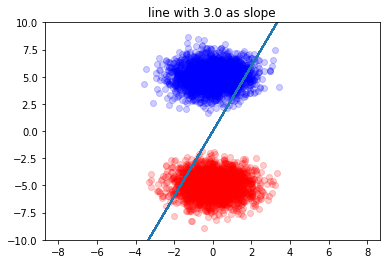

ELBO components with 5.0 as slope: 

mean log prior  -25.80664306640625
mean log post est  -8.466069946289062
mean likelihood est  -2764.4109375
Accuracy with 5.0 as slope:  82.46 %


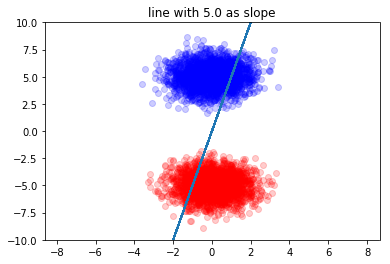

ELBO components with 5.5 as slope: 

mean log prior  -25.85571533203125
mean log post est  -8.812306518554687
mean likelihood est  -2770.8609375
Accuracy with 5.5 as slope:  83.91999999999999 %


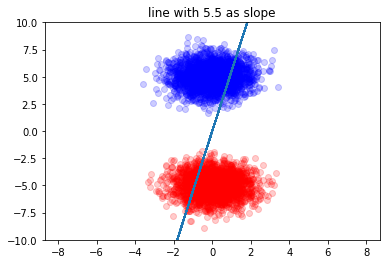

ELBO components with 6.0 as slope: 

mean log prior  -34.500029296875
mean log post est  -8.485695190429688
mean likelihood est  -inf
Accuracy with 6.0 as slope:  77.10000000000001 %


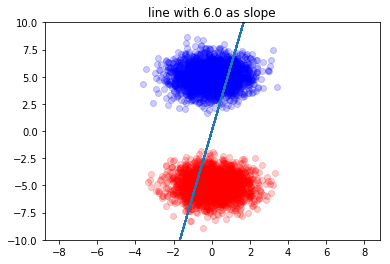

ELBO components with 7.0 as slope: 

mean log prior  -44.6871142578125
mean log post est  -8.633800048828125
mean likelihood est  -inf
Accuracy with 7.0 as slope:  76.55999999999999 %


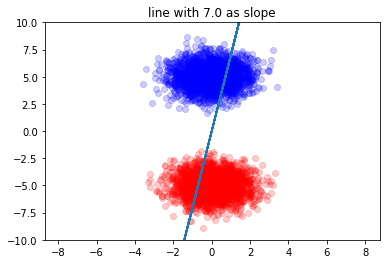

ELBO components with 10.0 as slope: 

mean log prior  -84.420361328125
mean log post est  -8.304771728515625
mean likelihood est  -inf
Accuracy with 10.0 as slope:  67.64 %


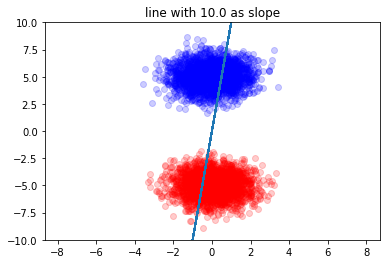

In [203]:
w1 = np.array([[10,1]]).T
w2 = np.array([[0,0]]).T
W_full = np.hstack((w1, w2))



b_full = np.array([0])
# b_full[0], b_full[1] = 0,0
bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy() 

# W_full
# W
# preset_preds.shape
# print('MAE of BNN with q mean == true weights: ', np.mean(np.abs(preset_preds - y_train.flatten())))
# print('acc of BNN with q mean == true weights: ', np.mean((preset_preds == y_train.flatten()).astype(int)))
# print('\n')
# print(preset_preds[1], y_train[1])
# bnn_preset.model.l1.W_log_s_DO
# bnn_preset.model.l1.b_log_s_O
# bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100).detach().numpy()

X_train1 = X_train
y_train1 = y_train

accuracies = []
weights = [0.1, 0.5, 1.0, 3.0, 5.0, 5.5, 6.0, 7.0, 10.0]
for w in weights:
    W_full[0][0] = w
    bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
    preset_preds = bnn_preset.model.forward(torch.Tensor(X_train1), predict=True).detach().numpy()
    print('ELBO components with {} as slope: \n'.format(w))
    bnn_preset.MC_elbo(torch.Tensor(X_train1), torch.Tensor(y_train1), 9, 10, 100).detach().numpy()
    print('Accuracy with {} as slope: '.format(w), np.mean((preset_preds == y_train1.flatten()).astype(int)) * 100, '%')
    
    x1 = np.random.uniform(-8, 8, 100)
    x2 = w * x1

    plt.title("line with {} as slope".format(w))
    plt.plot(x1, x2)
    plt.scatter(X_train1[y_train1 == 0,0], X_train1[y_train1 == 0,1], c='red', alpha=0.2)
    plt.scatter(X_train1[y_train1 == 1,0], X_train1[y_train1 == 1,1], c='blue', alpha=0.2)
    plt.ylim((-10, 10))
    plt.show()

In [196]:
np.exp(0)

# OK so I feel like this is a numerical stability thing but at the same time not sure how 
# meaningful these results are bc the weights weren't trained to calebrate probs with sigmoid...

1.0

mean log prior  -6.8455663045247395
mean log post est  -8.07962646484375
mean likelihood est  -154.414453125
grads  tensor([[-0.1562,  0.0857],
        [-0.1489,  0.1570]]) 

change in w1:  [ 0.00053266 -0.00108254] 
cur w1:  [-0.02203082 -0.04023209] 
old w1:  [-0.02256348 -0.03914956]
change in w2:  [-0.00132154 -0.00235388] 
cur w2:  [-0.00096326  0.00953309] 
old w2:  [0.00035827 0.01188698]
change in b:  [0.00198485 0.00135691] 
cur b:  [-0.01075498  0.0339417 ] 
old b:  [-0.01273983  0.03258479]
full weights: 
 [[-0.02203082 -0.00096326]
 [-0.04023209  0.00953309]]


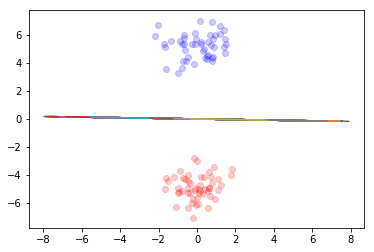

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  0 	Loss:  inf 	acc:  0.84 

mean log prior  -6.213548278808593
mean log post est  -8.094106547037761
mean likelihood est  -98.93846028645834
grads  tensor([[-0.0563,  0.1236],
        [ 0.1061,  0.1100]]) 

change in w1:  [-0.00084622 -0.00284281] 
cur w1:  [ 0.00648767 -0.02889283] 
old w1:  [ 0.00733389 -0.02605002]
change in w2:  [-0.00237256 -0.00055838] 
cur w2:  [-0.01937928  0.01786243] 
old w2:  [-0.01700671  0.01842082]
change in b:  [3.868714e-05 2.607545e-04] 
cur b:  [-0.02492753 -0.01222927] 
old b:  [-0.02496622 -0.01249003]
full weights: 
 [[ 0.00648767 -0.01937928]
 [-0.02889283  0.01786243]]


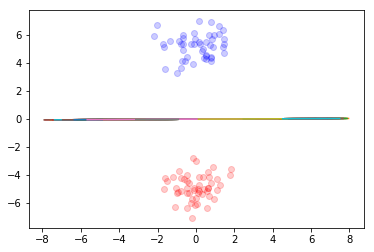

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  1 	Loss:  5918.8335 	acc:  1.0 

mean log prior  -6.002348836263021
mean log post est  -8.257383219401042
mean likelihood est  -103.73128255208333
grads  tensor([[-0.0430, -0.0831],
        [-0.0525, -0.0210]]) 

change in w1:  [0.00420087 0.00161538] 
cur w1:  [-0.01244422  0.00154589] 
old w1:  [-1.6645085e-02 -6.9487025e-05]
change in w2:  [-0.0015235 -0.0020886] 
cur w2:  [-0.04250536  0.02829752] 
old w2:  [-0.04098186  0.03038612]
change in b:  [-0.00149474 -0.00115142] 
cur b:  [-0.00587086  0.00204783] 
old b:  [-0.00437612  0.00319925]
full weights: 
 [[-0.01244422 -0.04250536]
 [ 0.00154589  0.02829752]]


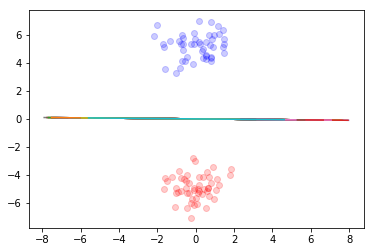

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  2 	Loss:  5203.2783 	acc:  0.0788 

mean log prior  -5.898846435546875
mean log post est  -8.543509928385417
mean likelihood est  -81.41614583333333
grads  tensor([[ 0.0198, -0.0906],
        [-0.0038,  0.1239]]) 

change in w1:  [-0.00301569  0.00246359] 
cur w1:  [-0.00857369 -0.00811497] 
old w1:  [-0.00555801 -0.01057856]
change in w2:  [0.00058761 0.00075093] 
cur w2:  [-0.00704972 -0.00869608] 
old w2:  [-0.00763732 -0.00944701]
change in b:  [0.00237376 0.00013714] 
cur b:  [-0.01214662 -0.00423503] 
old b:  [-0.01452038 -0.00437217]
full weights: 
 [[-0.00857369 -0.00704972]
 [-0.00811497 -0.00869608]]


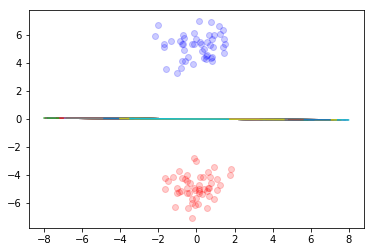

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  3 	Loss:  4579.507 	acc:  0.3142 

mean log prior  -5.811870320638021
mean log post est  -8.682375081380208
mean likelihood est  -82.46612955729167
grads  tensor([[-0.0046, -0.0136],
        [ 0.0348, -0.0846]]) 

change in w1:  [-0.00187964 -0.00035403] 
cur w1:  [0.00030738 0.00314372] 
old w1:  [0.00218703 0.00349775]
change in w2:  [0.00036797 0.00011092] 
cur w2:  [0.00141516 0.01218537] 
old w2:  [0.00104719 0.01207446]
change in b:  [0.00085903 0.00249519] 
cur b:  [0.01209413 0.01066089] 
old b:  [0.01123509 0.0081657 ]
full weights: 
 [[0.00030738 0.00141516]
 [0.00314372 0.01218537]]


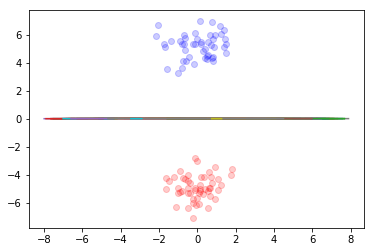

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  4 	Loss:  4260.6064 	acc:  0.0082 

mean log prior  -5.781125895182291
mean log post est  -9.144957478841146
mean likelihood est  -77.0202880859375
grads  tensor([[-0.0784, -0.0016],
        [ 0.0268, -0.0200]]) 

change in w1:  [ 0.00047319 -0.00255035] 
cur w1:  [ 0.01687871 -0.01060726] 
old w1:  [ 0.01640552 -0.00805692]
change in w2:  [-0.0004604   0.00136517] 
cur w2:  [-0.00927821 -0.0082087 ] 
old w2:  [-0.0088178  -0.00957386]
change in b:  [0.00147255 0.00052893] 
cur b:  [ 0.01416096 -0.01134817] 
old b:  [ 0.01268841 -0.0118771 ]
full weights: 
 [[ 0.01687871 -0.00927821]
 [-0.01060726 -0.0082087 ]]


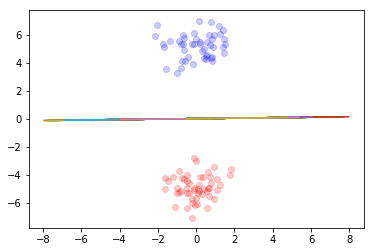

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  5 	Loss:  4049.1777 	acc:  0.039 

mean log prior  -5.6876271565755205
mean log post est  -8.446784973144531
mean likelihood est  -103.12327473958334
grads  tensor([[-0.0734,  0.0533],
        [-0.1197,  0.0012]]) 

change in w1:  [0.00107274 0.00013825] 
cur w1:  [0.00149605 0.00267096] 
old w1:  [0.00042331 0.00253272]
change in w2:  [-0.00037482  0.00023223] 
cur w2:  [ 0.00481431 -0.00863933] 
old w2:  [ 0.00518913 -0.00887156]
change in b:  [-3.012456e-05 -6.970009e-04] 
cur b:  [-0.01578479 -0.00908204] 
old b:  [-0.01575467 -0.00838504]
full weights: 
 [[ 0.00149605  0.00481431]
 [ 0.00267096 -0.00863933]]


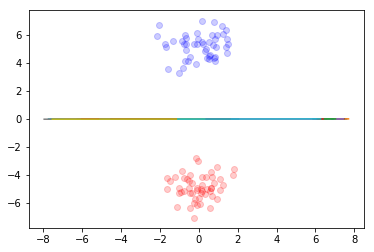

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  6 	Loss:  4006.2224 	acc:  1.0 

mean log prior  -5.674830627441406
mean log post est  -8.72692159016927
mean likelihood est  -87.58482259114584
grads  tensor([[ 0.0567,  0.0253],
        [-0.0531,  0.0515]]) 

change in w1:  [0.00118918 0.00156395] 
cur w1:  [-0.00251044 -0.0088697 ] 
old w1:  [-0.00369962 -0.01043365]
change in w2:  [ 0.0008428  -0.00054422] 
cur w2:  [0.00110909 0.000166  ] 
old w2:  [0.00026629 0.00071021]
change in b:  [-0.0004327   0.00087272] 
cur b:  [ 0.00374423 -0.00672515] 
old b:  [ 0.00417694 -0.00759787]
full weights: 
 [[-0.00251044  0.00110909]
 [-0.0088697   0.000166  ]]


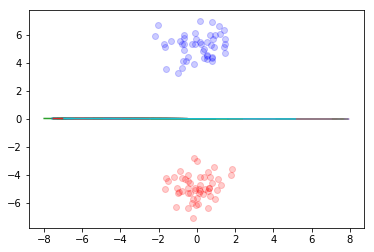

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  7 	Loss:  3844.2266 	acc:  1.0 

mean log prior  -5.638522338867188
mean log post est  -8.45434315999349
mean likelihood est  -85.23763834635416
grads  tensor([[-0.0413, -0.0341],
        [-0.0523, -0.0121]]) 

change in w1:  [-0.00281015  0.00049559] 
cur w1:  [-0.01379593 -0.00362569] 
old w1:  [-0.01098578 -0.00412128]
change in w2:  [-0.00029301  0.00042687] 
cur w2:  [ 0.00381337 -0.00666821] 
old w2:  [ 0.00410638 -0.00709508]
change in b:  [-0.00104917 -0.0006176 ] 
cur b:  [ 0.02236382 -0.00105694] 
old b:  [ 0.02341299 -0.00043934]
full weights: 
 [[-0.01379593  0.00381337]
 [-0.00362569 -0.00666821]]


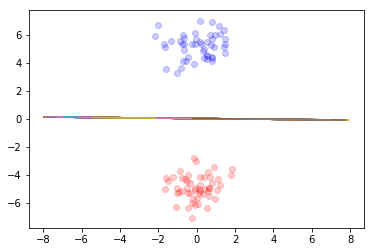

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  8 	Loss:  3738.2805 	acc:  1.0 

mean log prior  -5.625151062011719
mean log post est  -8.561415608723959
mean likelihood est  -80.9460205078125
grads  tensor([[ 0.0600,  0.0456],
        [-0.0392,  0.0098]]) 

change in w1:  [-0.00133615  0.00068281] 
cur w1:  [-0.01331732  0.01097913] 
old w1:  [-0.01198116  0.01029632]
change in w2:  [-0.00067791 -0.00019747] 
cur w2:  [0.00786066 0.00560275] 
old w2:  [0.00853856 0.00580022]
change in b:  [-0.00071199  0.00048873] 
cur b:  [ 0.0088438 -0.0144659] 
old b:  [ 0.00955579 -0.01495463]
full weights: 
 [[-0.01331732  0.00786066]
 [ 0.01097913  0.00560275]]


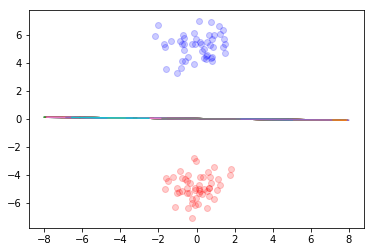

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  9 	Loss:  3712.9397 	acc:  0.9974 

mean log prior  -5.592200724283854
mean log post est  -7.958407084147136
mean likelihood est  -77.09530436197916
grads  tensor([[ 0.0090, -0.0338],
        [-0.0159, -0.0223]]) 

change in w1:  [0.00040467 0.00014623] 
cur w1:  [ 0.00739887 -0.00248476] 
old w1:  [ 0.00699421 -0.00263099]
change in w2:  [0.00047466 0.00098162] 
cur w2:  [-4.8341957e-05 -4.0083565e-03] 
old w2:  [-0.000523   -0.00498997]
change in b:  [0.00162128 0.00221787] 
cur b:  [0.00730536 0.01401237] 
old b:  [0.00568408 0.0117945 ]
full weights: 
 [[ 7.3988740e-03 -4.8341957e-05]
 [-2.4847644e-03 -4.0083565e-03]]


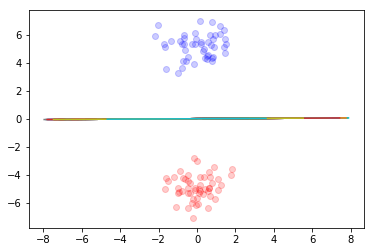

torch.Size([5000])
torch.Size([5000])
real:  [1. 0. 0. 0. 0. 1. 0.]
Epoch:  10 	Loss:  3621.4353 	acc:  0.0024 



KeyboardInterrupt: 

In [209]:
# bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, num_MC_samples=30, linear_regression=True, preset=False, classification=False)


bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, num_MC_samples=30, linear_regression=True, preset=False, classification=True)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=1.2e-2, batch_size=100)

In [ ]:
bnn.likelihood_est(torch.tensor(y_train), torch.tensor(y_train), 0.1)

In [66]:
a = torch.normal(torch.tensor([0.0]*5), torch.tensor([5.0]*5))
print(a)

sig = nn.Sigmoid()
sig(a) > 0.5

bnn.likelihood_est(torch.tensor([0.0]*5), a, 0.1)

tensor([-5.4249, -3.5355, -6.5829, -0.8022, -2.1740])


tensor(-0.5219)

In [20]:


# Hyperparameters that work: prior_s 0.8
# Fix likelihood mean at 1?
bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, linear_regression=True, preset=False)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=5e-2, batch_size=100)

mean log prior  -5.82107666015625
mean log post est  -8.086301879882813
mean likelihood est  -2271.96375
grads  tensor([[ 2.8113e-02, -9.0588e-02],
        [ 6.3300e+03,  4.8646e-02]]) 

change in w1:  [ 0.00274605 -0.00090171] 
cur w1:  [0.0091938  0.21898751] 
old w1:  [0.00644776 0.21988922]
change in w2:  [0.00075768 0.00232763] 
cur w2:  [0.00281862 0.04392753] 
old w2:  [0.00206095 0.0415999 ]
change in b:  [ 0.00857747 -0.00893347] 
cur b:  [0.28585297 0.03298711] 
old b:  [0.2772755  0.04192058]
full weights: 
 [[0.0091938  0.00281862]
 [0.21898751 0.04392753]]
pred type:  <class 'torch.Tensor'>
Epoch:  0 	Loss:  303350.34 	MAE:  0.28554413 



KeyboardInterrupt: 

In [0]:
for _ in range(10):
    pred1 = X_train @ W + b 
    pred2 = X_train @ W + b + np.random.normal(loc=0, scale=np.exp(X_train @ W_s + b_s))
    mae1 = np.mean(np.abs(pred1 - y_train))
    mae2 = np.mean(np.abs(pred2 - y_train))
    print("MAE 1: ", mae1, "MAE 2:", mae2)

MAE 1:  3.0056122393554254 MAE 2: 4.229932547897288
MAE 1:  3.0056122393554254 MAE 2: 4.163598483397882
MAE 1:  3.0056122393554254 MAE 2: 4.064748158286918
MAE 1:  3.0056122393554254 MAE 2: 4.157970359536937
MAE 1:  3.0056122393554254 MAE 2: 4.18713532994711
MAE 1:  3.0056122393554254 MAE 2: 4.068806773370651
MAE 1:  3.0056122393554254 MAE 2: 4.10697160790373
MAE 1:  3.0056122393554254 MAE 2: 4.275199441081447
MAE 1:  3.0056122393554254 MAE 2: 4.105935688264671
MAE 1:  3.0056122393554254 MAE 2: 4.140327650161342


tensor([ 73.2484, -10.4592,  80.1985,  36.0612,  85.2357],
       grad_fn=<SelectBackward>)
tensor([52.9553,  7.0205, 62.6282,  ...,  5.3123,  3.1554, 38.7316],
       grad_fn=<ExpBackward>)
[[ 0.          7.83732011]
 [ 0.         -0.55350876]
 [ 0.          8.53399163]
 ...
 [ 0.         -1.71126102]
 [ 0.         -3.87444431]
 [ 0.          6.53840831]]


Text(0, 0.5, 'output[:,1] (Standard Deviation)')

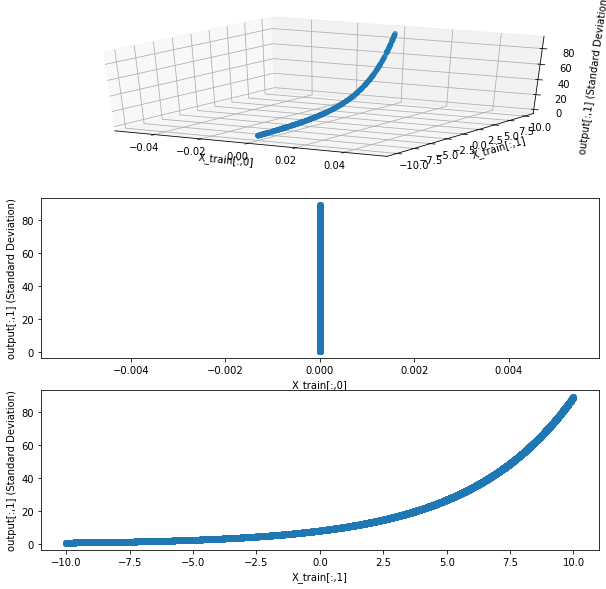

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

final_pred = bnn.model.forward(torch.Tensor(X_train))
print(final_pred[:5,0])


pred_std = torch.exp(final_pred[:,1])

print(pred_std)
print(X_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:sparse_cap,0], X_train[:sparse_cap,1], pred_std[:sparse_cap].detach().numpy())
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')



# 2D Plot:
ax_2d_x = fig.add_subplot(312)
ax_2d_x.scatter(X_train[:,0], pred_std.detach().numpy())
ax_2d_x.set_xlabel('X_train[:,0]')
ax_2d_x.set_ylabel('output[:,1] (Standard Deviation)')


ax_2d_y = fig.add_subplot(313)
ax_2d_y.scatter(X_train[:,1], pred_std.detach().numpy())
ax_2d_y.set_xlabel('X_train[:,1]')
ax_2d_y.set_ylabel('output[:,1] (Standard Deviation)')



[ 0.7019849  0.8952522  1.1417292  1.4560653  1.8569429  2.3681886
  3.020188   3.8516934  4.9121256  6.2645106  7.9892287 10.18879
 12.993922  16.571356  21.13371   26.95215   34.372505  43.8358
 55.904476  71.295845  90.9247   ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


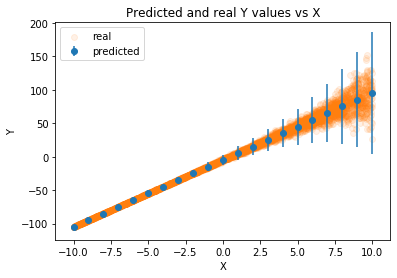

[array([0.05502322]), array([0.07427358]), array([0.10025884]), array([0.13533528]), array([0.18268352]), array([0.24659696]), array([0.33287108]), array([0.44932896]), array([0.60653066]), array([0.81873075]), array([1.10517092]), array([1.4918247]), array([2.01375271]), array([2.71828183]), array([3.66929667]), array([4.95303242]), array([6.68589444]), array([9.0250135]), array([12.18249396]), array([16.44464677]), array([22.19795128])]


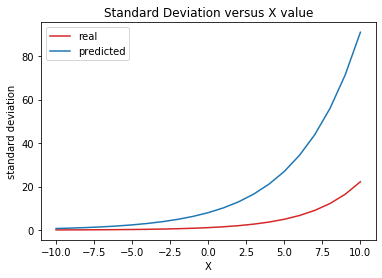

In [0]:
np.zeros(40)
X_sample = np.vstack([np.zeros(21), np.array(list(range(-10,11)))]).T
X_sample = torch.tensor(np.array(X_sample), dtype=torch.float32)


predictions = bnn.model.forward(torch.Tensor(X_train))

sample_pred = bnn.model.forward(X_sample)

y_pred = sample_pred[:,0].detach().numpy()
std_pred = torch.exp(sample_pred[:,1]).detach().numpy()
log_s_pred = sample_pred[:,1].detach().numpy()

print(std_pred)

# Sample variance to add to the y predictions
std_array = []
for scale in std_pred:
  std_array.append(np.random.normal(loc=0, scale=np.exp(scale)))
std_array = np.array((std_array))



"""
plt.scatter(X_train[:,0], y_pred + std_array, alpha=.1, label='predicted')
plt.scatter(X_train[:,0], y_train, alpha=.1, label='real')
plt.title("Y hat and Y values across X1")
plt.legend()
plt.savefig("x1_y.png")
"""


plt.show()

# For constant std dev#
#std_pred = 10 * torch.ones([y_pred.shape[0]], dtype=torch.float64)
# For constant std dev#

#plt.scatter(X_train[:,1], y_pred + std_array, alpha=.1, label='predicted')
#plt.scatter(X_sample[:,1], y_pred, alpha=.1, label='predicted')
plt.errorbar(X_sample[:,1], y_pred, yerr=(std_pred), fmt='o', label='predicted')
plt.scatter(X_train[:,1], y_train, alpha=.1, c='C1', label='real')
plt.ylabel("Y")
plt.xlabel("X")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.title("Predicted and real Y values vs X")
plt.legend()
plt.savefig("x_y1.png")
plt.show()



#stds = []
#Xs = list(range(-10, 11))
#for x in Xs:
#    stds.append(x + b_s)

#std_pred = predictions[:,1].detach().numpy()

real_std = []
for x in range(-10, 11):
    real_std.append(np.exp(np.array([0, x] @ W_s + b_s)))
print(real_std)
# plt.plot(list(range(-10,11)), list(range(0, 21)), c='C3', label='real')
plt.plot(list(range(-10,11)), real_std, c='C3', label='real')
plt.plot(X_sample[:,1], (std_pred), label='predicted')
plt.title("Standard Deviation versus X value")
plt.ylabel("standard deviation")
plt.xlabel("X")
plt.legend()
plt.savefig("std1.png")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.show()

In [0]:
print(torch.exp(bnn.model.l1.W_log_s_DO))

tensor([[0.1449, 0.1307, 0.1374, 0.1398, 0.1270],
        [0.5950, 0.5896, 0.5357, 0.6016, 0.5273]], grad_fn=<ExpBackward>)


In [0]:

plt.plot([i for i in range(100)], loss_by_epoch)

NameError: ignored

In [114]:
a = torch.tensor([3,3,3])
b = torch.tensor([5,5,3])
a == b

tensor([0, 0, 1], dtype=torch.uint8)